<a href="https://colab.research.google.com/github/AnitaKirkovska/Quantum_Computing/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1



**Fourier matrix**
Let $\omega=\mathrm{exp}(2\pi i/N)$ be the $N$th root of unity. The Fourier matrix of size $N$ is the matrix $F_N=(q_{k,\ell})\in\mathbb{C}^{N\times N}$ whose entries are given by$$q_{k,\ell}=\frac{1}{\sqrt{N}} \omega^{k \cdot \ell}$$for $k, \ell \in \{0,\ldots,N-1\}$.

Using numpy, implement the function get_fourier_matrix that creates the Fourier matrix of size $N$.

Compute the eigenvalues of eigenvectors of the Fourier matrix.

To check that your code is correct, you should verify the following properties:

the Fourier matrix is unitary
the fourth power of $F_N^4$ is equal to the identity matrix
its eigenvalues are $1, i, -1, -i$ (the multiplicities of these eigenvalues are given on the wikipedia page discrete fourier transform in section eigenvalues and eigenvectors)


In [0]:
import numpy as np
import cmath
import math 

#function that creates the Fourier matrix of size N
def get_fourier_matrix(N):
  w = np.exp((1j*2*np.pi)/N)
  x = np.eye(N, dtype=complex)
  for i in range(N):
    for j in range(N):
      x[i][j] = (w**(i*j))/(N**0.5)
  return x

In [0]:
def is_unitary(U):
  if (np.allclose(np.eye(len(U)), U.dot(U.T.conj()))): return 'The matrix is unitary.'
  else: return 'The matrix is NOT unitary.'

In [0]:
F = get_fourier_matrix(4)

print(is_unitary(F))
print('\n')
print ('Fourier matrix for N = 4', F)
print('\n')
print('Eigenvalues are:', np.linalg.eigvals(F)) 
print('\n')
print('Eigenvalues and the right Eigenvectors are:', np.linalg.eig(F))

The matrix is unitary.


Fourier matrix for N = 4 [[ 5.00000000e-01+0.0000000e+00j  5.00000000e-01+0.0000000e+00j
   5.00000000e-01+0.0000000e+00j  5.00000000e-01+0.0000000e+00j]
 [ 5.00000000e-01+0.0000000e+00j  3.06161700e-17+5.0000000e-01j
  -5.00000000e-01+6.1232340e-17j -9.18485099e-17-5.0000000e-01j]
 [ 5.00000000e-01+0.0000000e+00j -5.00000000e-01+6.1232340e-17j
   5.00000000e-01-1.2246468e-16j -5.00000000e-01+1.8369702e-16j]
 [ 5.00000000e-01+0.0000000e+00j -9.18485099e-17-5.0000000e-01j
  -5.00000000e-01+1.8369702e-16j  2.75545530e-16+5.0000000e-01j]]


Eigenvalues are: [ 1.00000000e+00+3.42424236e-17j -1.00000000e+00+1.02727271e-16j
  1.11022302e-16+1.00000000e+00j  1.00000000e+00-2.04697370e-16j]


Eigenvalues and the right Eigenvectors are: (array([ 1.00000000e+00+3.42424236e-17j, -1.00000000e+00+1.02727271e-16j,
        1.11022302e-16+1.00000000e+00j,  1.00000000e+00-2.04697370e-16j]), array([[ 8.66025404e-01+0.00000000e+00j, -5.00000000e-01-3.42424236e-17j,
         4.601

In [0]:
#end of first part of Problem 1

**Cyclic shift matrix**
The cyclic shift matrix is the matrix $P_N=(p_{k,\ell}\in\mathbb{C}^{N\times N}$ whose entries are given by

$$ p_{k,\ell} = 1 \mbox{ if } \ell = k + 1 \pmod{N} $$$$ p_{k,\ell} = 0 \mbox{ if } \ell \neq k + 1 \pmod{N} $$
Using numpy, implement the function get_cyclic_shift_matrix that create the cyclic shift matrix of size $N$.

Compute the eigenvalues of $P_N$.

To show that your code is correct, you should verify the following properties:

the cyclic shift matrix is unitary
the $N$th power of the cyclic shift matrix is the identity matrix
the eigenvalues of the cyclic shift matrix are $N$th roots of unity
the cyclic shift matrix is diagonalized by the Fourier matrix, that is, $F_N^\dagger P_N F_N$ is diagonal.


In [0]:
from numpy.linalg import matrix_power

def get_cyclic_shift_matrix(N):
  x = np.eye(N, dtype=int)
  for i in range(N):
    for j in range(N):
      x[i][j] = 1 if (j == (i+1)%N) else 0
  return x

def Nth_power(C, N):             
  N -=1
  c = C
  while(N!=0):
    c = np.matmul(C, c)
    N -= 1
  return c

def equal(C,N):
  if np.allclose(Nth_power(C,N),np.eye(4)): return ('The', N,'th','power of the Cyclic Matrix is equal to its Identity Matrix.')
  else: return 'The', N,'th','power of the Cyclic Matrix is NOT equal to its Identity Matrix.' 

def Nth_roots(N):
  w = np.exp((1j*2*np.pi)/N)
  x = np.empty(N, dtype=complex)
  x[0] = w
  for i in range(1, N):
    x[i] = x[i-1]*w
  return x

def eigen_root_unity(C,N):
  if np.allclose(np.sort_complex(np.linalg.eigvals(C)), np.sort_complex(Nth_roots(N))): 
    return ('The eigenvalues of the cyclic shift matrix are the', N,'th','roots of unity')
  else:
    return ('The eigenvalues of the cyclic shift matrix are NOT the', N,'th','roots of unity')

#the cyclic shift matrix is diagonalized by the Fourier matrix, that is, $F_N^\dagger P_N F_N$ is diagonal.
def diagonalized(C,F,N):
  X = np.matmul(np.matmul(F.T.conj(), C), F)
  X_no_diagonal = X - np.diag(np.diag(X))
  if np.allclose(np.zeros((N,N)), X_no_diagonal): return 'The cyclic shift matrix is diagonalized by the Fourier matrix.'
  else: return 'The cyclic shift matrix is NOT diagonalized by the Fourier matrix.'


In [0]:
C = get_cyclic_shift_matrix(4)
F = get_fourier_matrix(4)

print(is_unitary(C))
print(equal(C,4))
print(eigen_root_unity(C,4))
print(diagonalized(C,F,4))

The matrix is unitary.
('The', 4, 'th', 'power of the Cyclic Matrix is equal to its Identity Matrix.')
('The eigenvalues of the cyclic shift matrix are the', 4, 'th', 'roots of unity')
The cyclic shift matrix is diagonalized by the Fourier matrix.


In [0]:
#end of second part of Problem 1

# Problem 2


Using Qiskit IBM Q Experience, implement the quantum phase estimation circuit with 3-bit precision.

This quantum circuit is explained on pages 110-113 (Inverse Fourier transform for 3 qubits) of the lecture slides.

Write a function that create the state

$$ 
\frac{1}{\sqrt{2}} ( |0\rangle + e^{2\pi i 2^2 \varphi} |1\rangle ) \otimes 
\frac{1}{\sqrt{2}} ( |0\rangle + e^{2\pi i 2^1 \varphi} |1\rangle ) \otimes 
\frac{1}{\sqrt{2}} ( |0\rangle + e^{2\pi i 2^0 \varphi} |1\rangle ) 
$$
for arbitrary $\varphi\in [0,1)$.

(This is the state that we would obtain by

preparing the three control bits in the $|+\rangle$ state
applying the control power of $U^{2^2}, U^{2^1}, U^{2^0}$ gates
assuming that the target qubit is in state $|\psi\rangle$ and $U|\psi\rangle=e^{2 \pi i \varphi} |\psi\rangle$.)

You can preprare the initial state applying U1 gates on qubits prepared $|+\rangle$. See Qiskit U1 gate documentation.

The controlled $R_k^\dagger$ gates occuring in the inverse Fourier transform circuit can be realized with the help of controlled U1 gates.

*Resources/Help from:*

1.   https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html


In [0]:
!pip install qiskit
!pip install qiskit-terra[visualization] 

In [0]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
from math import pi
import numpy as np

# importing Qiskit
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *

# import basic plot tools
from qiskit.visualization import plot_histogram

Four qubits as counting qubits, and qubit 3 as the eigenstate of the unitary operator ( 𝑇 ).

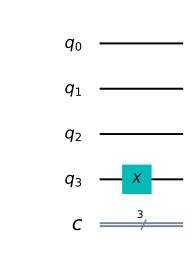

In [34]:
qpe = QuantumCircuit(4, 3)
qpe.x(3)
qpe.draw(output='mpl')

Hadamard test

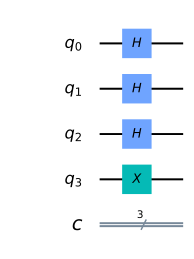

In [35]:
for qubit in range(3):
    qpe.h(qubit)
qpe.draw(output='mpl')

Inverse Fourier function

In [0]:
def inverse_fourier(circ,n):
  for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
  for j in range(n):
    for m in range(j):
      circ.cu3(0, -math.pi/float(2**(j-m)),0, m, j)
      #apply hadamard
    circ.h(j)

In [0]:
qpe.barrier()
# Apply inverse QFT
inverse_fourier(qpe, 3)
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)

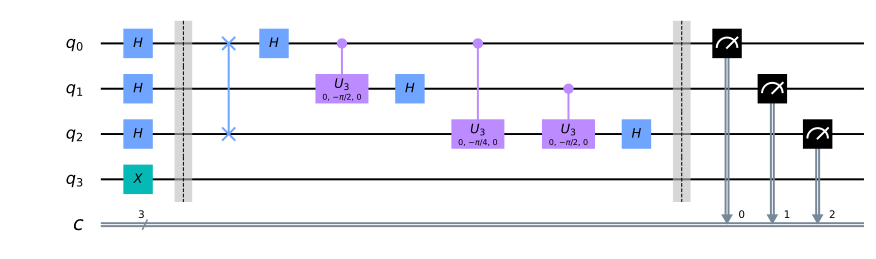

In [38]:
qpe.draw(output="mpl")


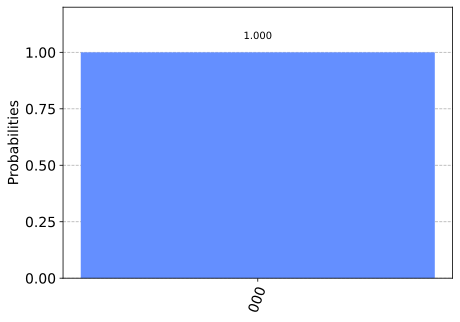

In [39]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)
